## Feature Engineering

In [546]:
import pandas as pd

In [547]:
data = pd.read_csv("../data/data-preprocessed.csv")

In [548]:
import missingno as msno

In [549]:
data.iloc[:,26:39].head()

,ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento,ATENDIMENTOS_AGENDA_Faltas Acolhimento,ATENDIMENTOS_AGENDA_Datas Acolhimento,ATENDIMENTOS_AGENDA_Qde Psicoterapia,ATENDIMENTOS_AGENDA_Faltas Psicoterapia,ATENDIMENTOS_AGENDA_Qde Prescrições,ATENDIMENTOS_AGENDA_Datas Prescrição,TWILIO_Mensagens Inbound,TWILIO_Mensagens Outbound,TWILIO_Ligações Outbound,PESSOA_PIPEDRIVE_age,PESSOA_PIPEDRIVE_has_public_health_plan,PESSOA_PIPEDRIVE_tem_data_dataframe_de_termino_de_contrato
0,1,0,2022-04-29 18:00:00,0,0,0,NaN,13,38,2,52,0,0
1,0,0,Nunca ocorreu,0,0,0,NaN,0,0,0,32,1,1
2,0,0,Nunca ocorreu,0,0,0,NaN,0,0,0,38,1,1
3,0,0,Nunca ocorreu,0,0,0,NaN,0,0,0,32,1,1
4,0,0,Nunca ocorreu,0,0,0,NaN,0,0,0,37,1,1


<Axes: >

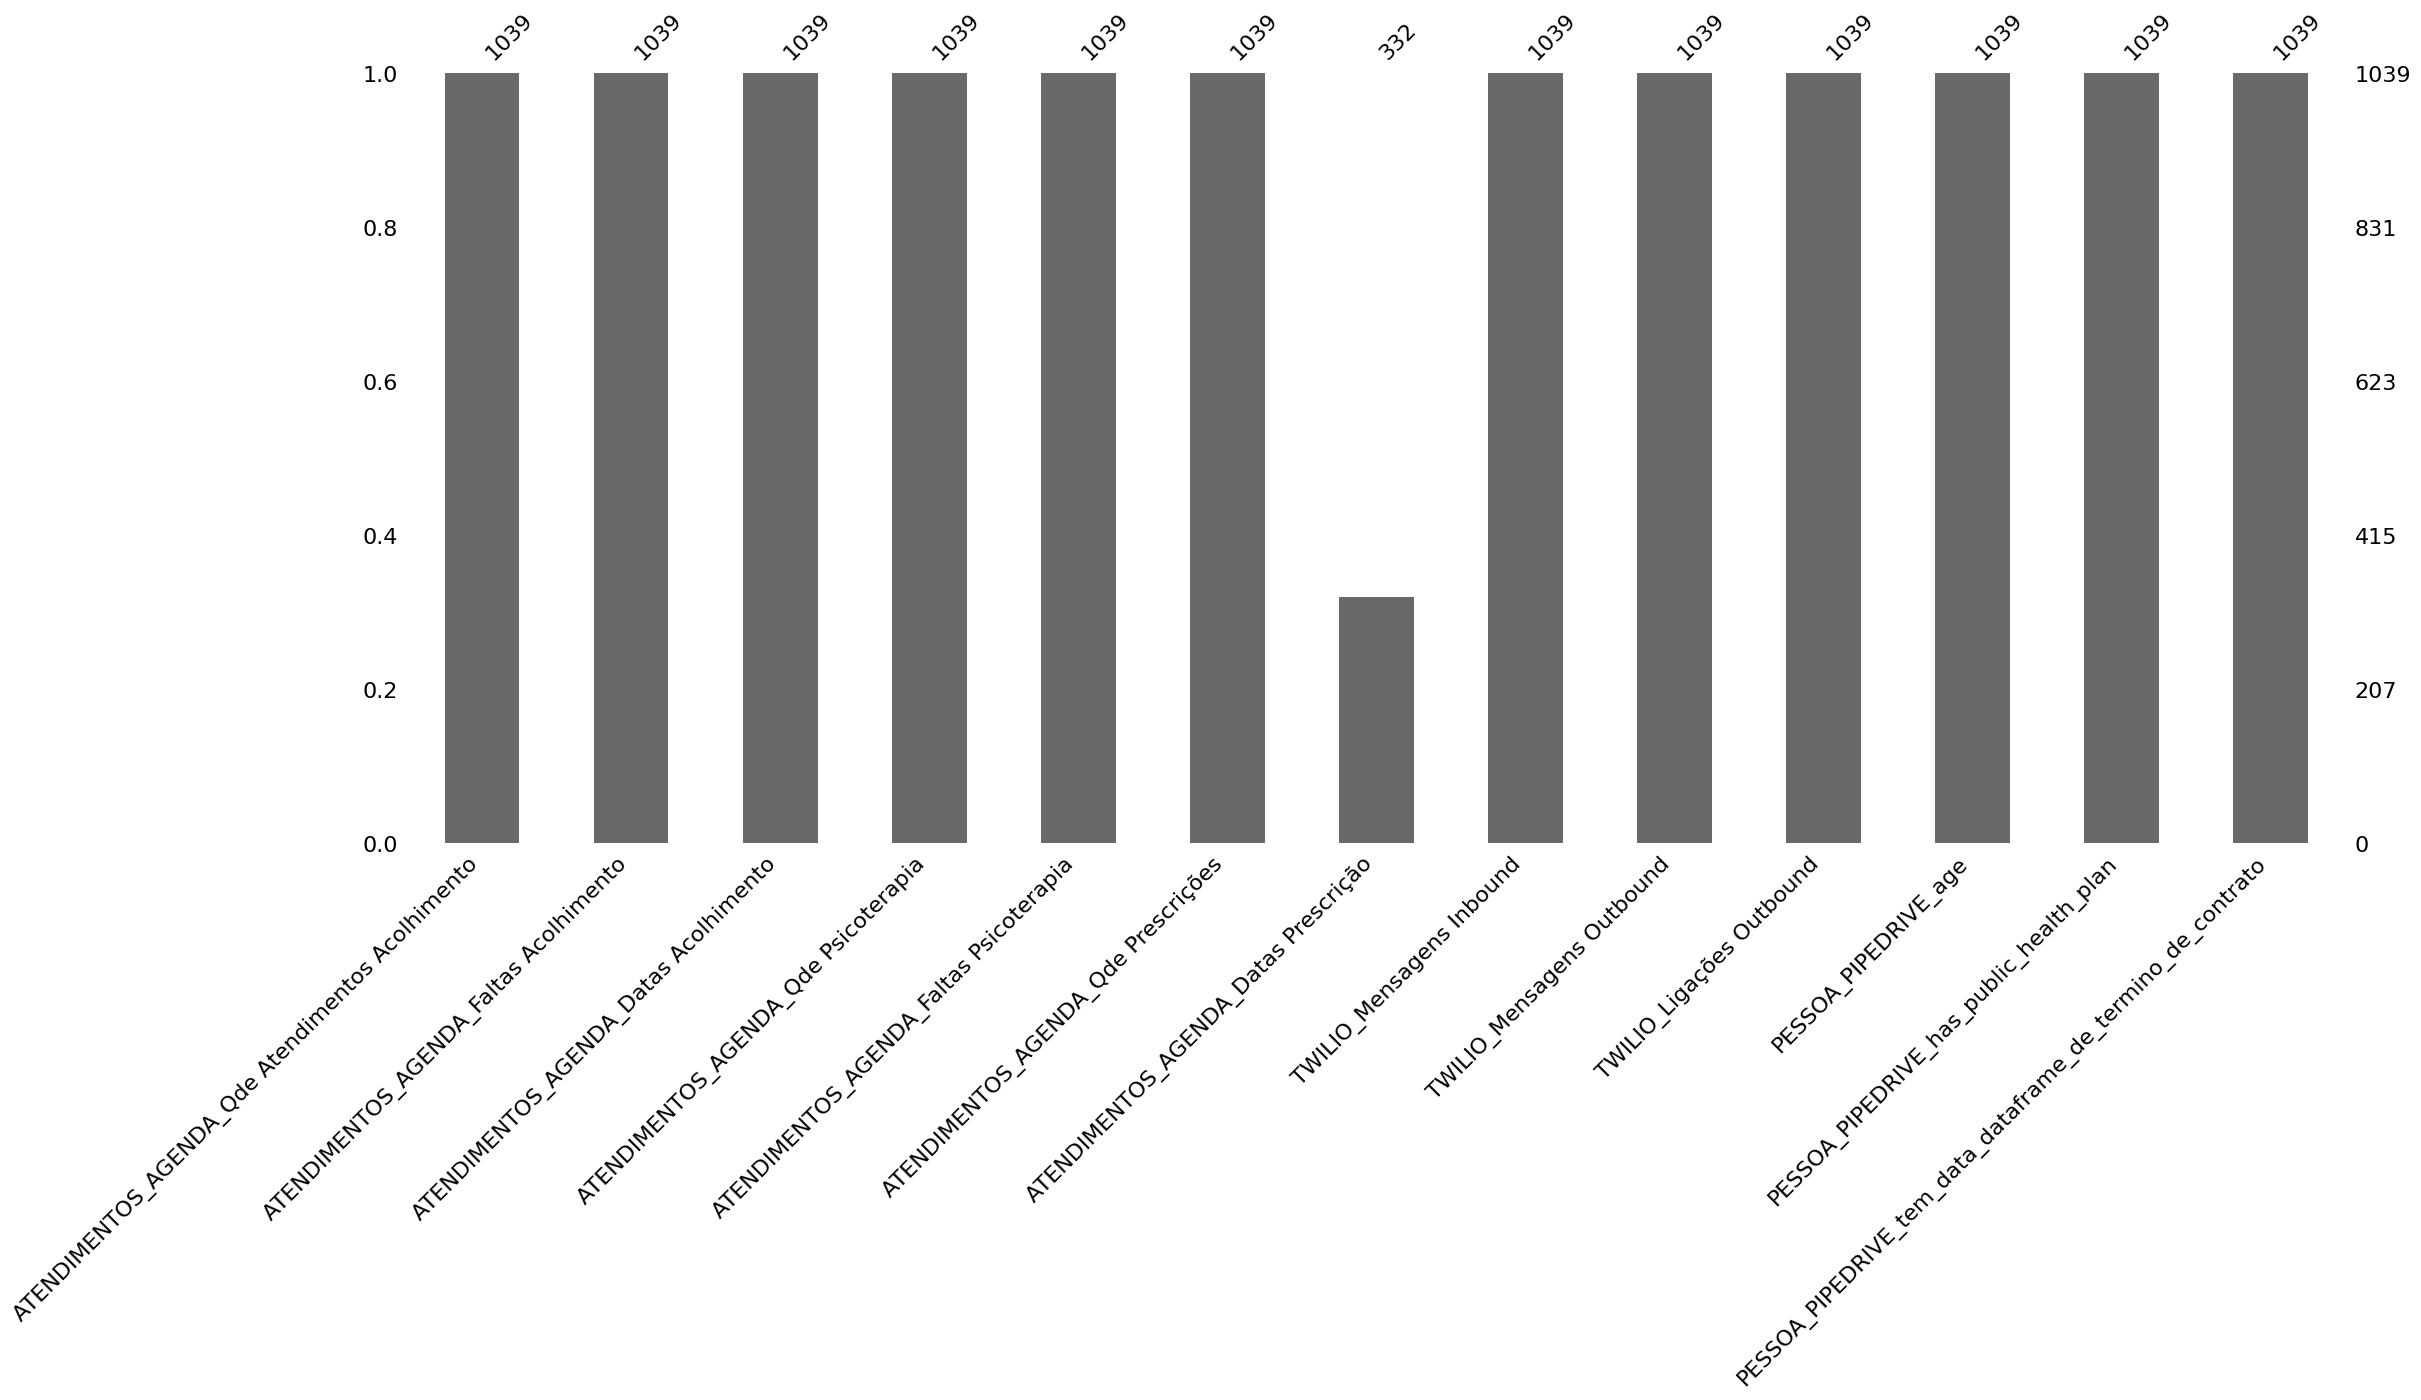

In [550]:
msno.bar(data.iloc[:,26:39])

## ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento

Descrição : Contagem dos atendimentos realizados com a equipe de acolhimento da Ana Health

Observação : Junto a coluna "ATENDIMENTOS_AGENDA_Datas Acolhimento", podemos criar uma nova coluna indicando a frequencia de atendimentos por mês de cada cliente


In [551]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"]

0       1
1       0
2       0
3       0
4       0
       ..
1034    0
1035    0
1036    0
1037    0
1038    0
Name: ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento, Length: 1039, dtype: int64

<Axes: >

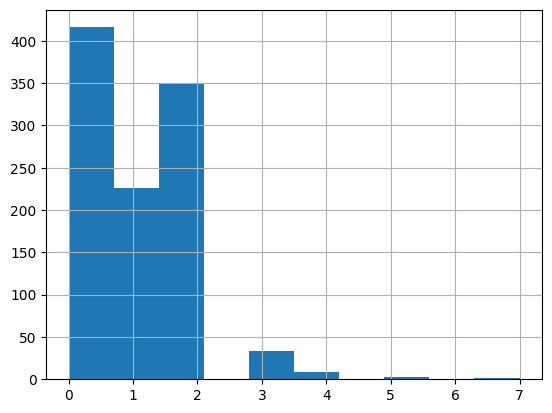

In [552]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"].hist()

In [553]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"].fillna(0,inplace=True)

In [554]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento"]

0       1
1       0
2       0
3       0
4       0
       ..
1034    0
1035    0
1036    0
1037    0
1038    0
Name: ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento, Length: 1039, dtype: int64

In [555]:
data["ATENDIMENTOS_AGENDA_Faltas Acolhimento"].fillna(0,inplace=True)

In [556]:
data["ATENDIMENTOS_AGENDA_Faltas Acolhimento"]

0       0
1       0
2       0
3       0
4       0
       ..
1034    0
1035    0
1036    0
1037    0
1038    0
Name: ATENDIMENTOS_AGENDA_Faltas Acolhimento, Length: 1039, dtype: int64

<Axes: >

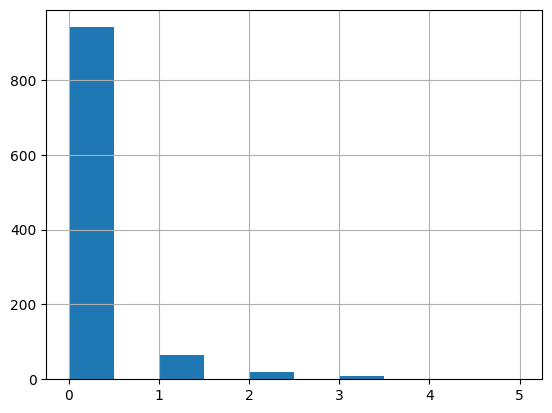

In [557]:
data["ATENDIMENTOS_AGENDA_Faltas Acolhimento"].hist()

 ```Analise Multivariada entre ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento e ATENDIMENTOS_AGENDA_Faltas Acolhimento```

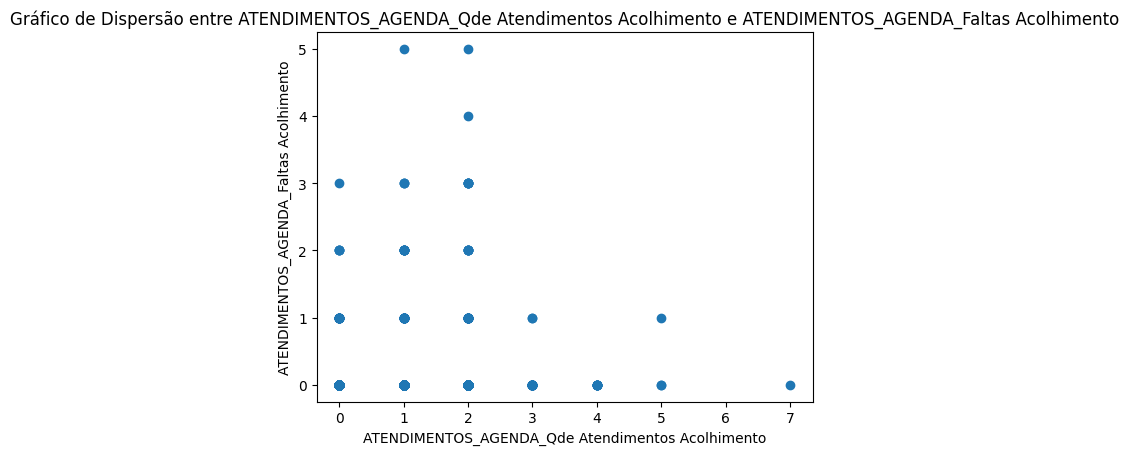

In [558]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(data['ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento'], data['ATENDIMENTOS_AGENDA_Faltas Acolhimento'])
plt.xlabel('ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento')
plt.ylabel('ATENDIMENTOS_AGENDA_Faltas Acolhimento')
plt.title('Gráfico de Dispersão entre ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento e ATENDIMENTOS_AGENDA_Faltas Acolhimento')
plt.show()

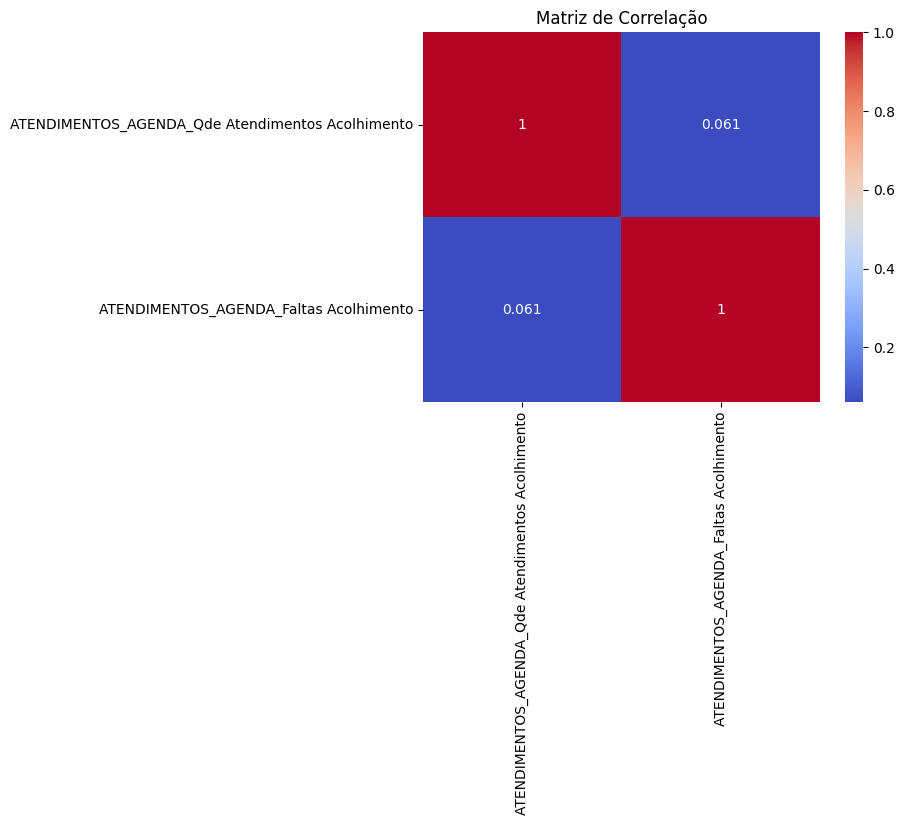

In [559]:
import seaborn as sns

# Calcule a matriz de correlação
correlation_matrix = data[["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento","ATENDIMENTOS_AGENDA_Faltas Acolhimento"]].corr()


# Plote um heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [560]:
data["ATENDIMENTOS_AGENDA_Datas Acolhimento"].fillna("Nunca ocorreu",inplace=True)

In [561]:
data = data[~data['ATENDIMENTOS_AGENDA_Datas Acolhimento'].astype(str).str.contains("Nunca ocorreu")]

In [562]:
import pandas as pd

# Suponha que você tenha um DataFrame chamado 'data' com uma coluna 'ATENDIMENTOS_AGENDA_Datas Acolhimento'
data['ATENDIMENTOS_AGENDA_Datas Acolhimento'] = data['ATENDIMENTOS_AGENDA_Datas Acolhimento'].str.split(';')

# Se você deseja criar uma nova coluna para cada data:
data = data.explode('ATENDIMENTOS_AGENDA_Datas Acolhimento')
data['ATENDIMENTOS_AGENDA_Datas Acolhimento'] = pd.to_datetime(data['ATENDIMENTOS_AGENDA_Datas Acolhimento'].str.strip(), format='%Y-%m-%d %H:%M:%S')




In [563]:
data['ATENDIMENTOS_AGENDA_Datas Acolhimento']

0      2022-04-29 18:00:00
11     2022-04-18 17:20:00
13     2022-04-25 17:20:00
15     2022-04-18 15:00:00
15     2023-06-05 10:00:00
               ...        
1030   2023-11-23 21:00:00
1030   2023-11-28 21:00:00
1030   2023-11-28 21:00:00
1032   2023-11-30 10:00:00
1033   2023-11-30 15:00:00
Name: ATENDIMENTOS_AGENDA_Datas Acolhimento, Length: 1086, dtype: datetime64[ns]

In [564]:
data['ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes'] = data['ATENDIMENTOS_AGENDA_Datas Acolhimento'].dt.month

In [565]:
data['ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes']

0        4
11       4
13       4
15       4
15       6
        ..
1030    11
1030    11
1030    11
1032    11
1033    11
Name: ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes, Length: 1086, dtype: int32

In [566]:
atendimentos_por_mes = data.groupby(['PESSOA_PIPEDRIVE_id_person', 'ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes']).size().reset_index(name='ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento')


In [567]:
data = pd.merge(data, atendimentos_por_mes, on=['PESSOA_PIPEDRIVE_id_person', 'ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes'], how='left')

<Axes: >

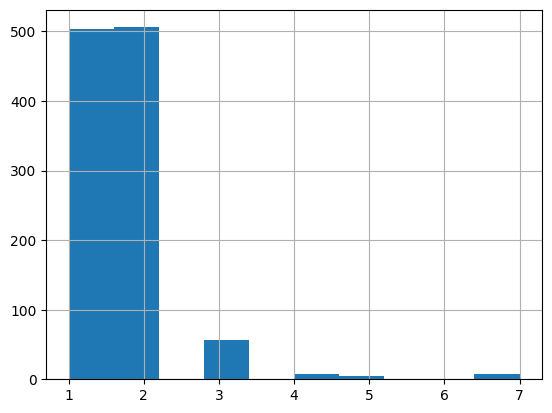

In [568]:
data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento_y"].hist()

In [569]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_contract_start_date,PESSOA_PIPEDRIVE_contract_end_date,PESSOA_PIPEDRIVE_Canal de Preferência,PESSOA_PIPEDRIVE_notes_count,...,WHOQOL_Social_New,WHOQOL_Ambiental_New,COMUNICARE_Problemas Abertos Bool,TWILIO_Data Última Mensagens Inbound Recente,last_stage_concluded,process_time,TWILIO_Data Última Mensagens Outbound Recente,TWILIO_Data Última Ligações Outbound Recente,ATENDIMENTOS_AGENDA_Datas Acolhimento Por Mes,ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento_y
0,250,64,82,São Paulo,São Paulo,04534-020,2021-01-28,NaN,0,1,...,3.7,4.0,0,0,Questionário,2022-04-29 03:00:00,0,0,4,1
1,343,64,80,Minas Gerais,Belo Horizonte,30421-318,2021-01-21,NaN,0,3,...,4.3,4.1,0,1,Questionário,2022-04-19 15:19:05,1,0,4,1
2,453,63,80,Pará,Ananindeua,67110-280,2021-03-25,NaN,0,3,...,5.0,3.9,0,1,Questionário,2022-04-26 03:00:00,1,0,4,1
3,483,64,80,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,...,4.0,4.5,0,0,Questionário,2022-04-19 15:19:40,1,1,4,1
4,483,64,80,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,...,4.0,4.5,0,0,Questionário,2022-04-19 15:19:40,1,1,6,1


## ATENDIMENTOS_AGENDA_Faltas Acolhimento

Descrição : Contagem das faltas considerando apenas os atendimentos com a equipe de acolhimento


Observação : Junto com a coluna "ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento", podemos criar uma nova coluna indicando a taxa de falta de cada cliente, o que pode ajudar a indicar o nível de comprometimento do cliente com os agendamentos.


In [570]:
data["ATENDIMENTOS_AGENDA_Faltas Taxa"] = data["ATENDIMENTOS_AGENDA_Faltas Acolhimento"] / data["ATENDIMENTOS_AGENDA_Qde Atendimentos Acolhimento_x"]

In [571]:
data["ATENDIMENTOS_AGENDA_Faltas Taxa"].value_counts()

ATENDIMENTOS_AGENDA_Faltas Taxa
0.000000    967
0.500000     44
1.000000     35
1.500000     12
2.000000     11
0.333333      6
0.200000      5
3.000000      3
2.500000      2
5.000000      1
Name: count, dtype: int64

<Axes: >

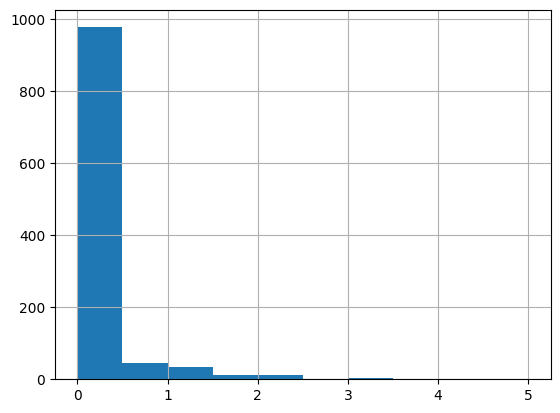

In [572]:
data["ATENDIMENTOS_AGENDA_Faltas Taxa"].hist()

In [573]:
data["ATENDIMENTOS_AGENDA_Datas Prescrição"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1081    NaN
1082    NaN
1083    NaN
1084    NaN
1085    NaN
Name: ATENDIMENTOS_AGENDA_Datas Prescrição, Length: 1086, dtype: object

## TWILIO_Mensagens Inbound e TWILIO_Mensagens Outbound

Descrição : Contagem de mensagens enviadas pela pessoa
            e
            Contagem de mensagens enviadas pela equipe de saúde


Observação : Através dessas duas colunas, podemos calcular a razão entre as mensagens recebidas e as mensagens enviadas, conseguindo refletir o engajamento e a participação ativa do cliente na plataforma.


 ```Analise Multivariada entre TWILIO_Mensagens Inbound e TWILIO_Mensagens Outbound```

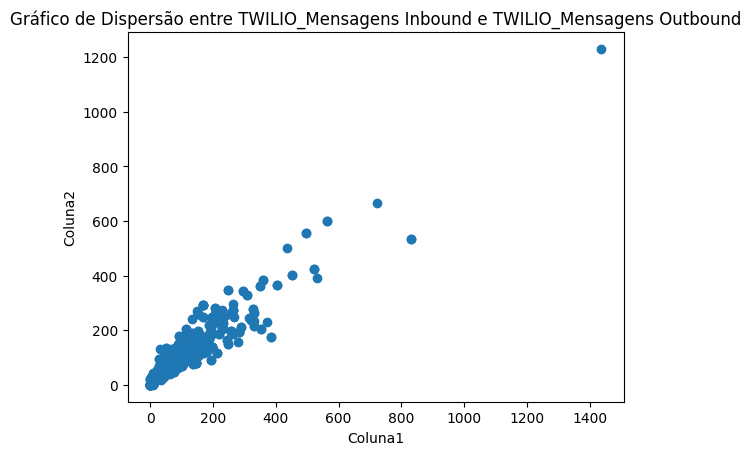

In [574]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(data['TWILIO_Mensagens Inbound'], data['TWILIO_Mensagens Outbound'])
plt.xlabel('Coluna1')
plt.ylabel('Coluna2')
plt.title('Gráfico de Dispersão entre TWILIO_Mensagens Inbound e TWILIO_Mensagens Outbound')
plt.show()

In [575]:
data["TWILIO_Mensagens Já Enviou"] = data["TWILIO_Mensagens Inbound"] > 0

In [576]:
data["TWILIO_Mensagens Razão"] = data["TWILIO_Mensagens Outbound"] / data["TWILIO_Mensagens Inbound"].where(data["TWILIO_Mensagens Já Enviou"], 1)

<Axes: >

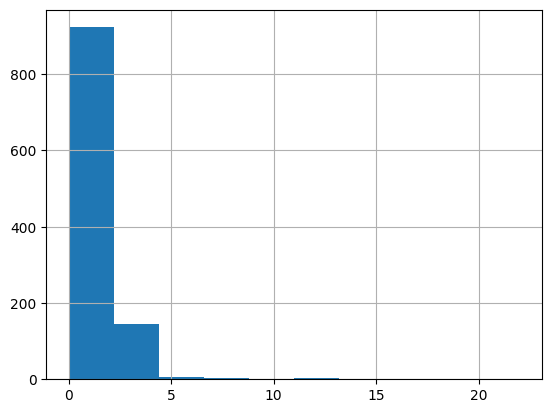

In [577]:
data["TWILIO_Mensagens Razão"].hist()

In [578]:
data["TWILIO_Mensagens Razão"].value_counts()

TWILIO_Mensagens Razão
0.000000    32
2.000000    25
1.000000    18
3.000000    17
1.500000    14
            ..
1.521739     1
7.000000     1
4.125000     1
0.757009     1
1.080000     1
Name: count, Length: 471, dtype: int64

## PESSOA_PIPEDRIVE_age

Descrição : Idade da Pessoa


Observação : Iremos dividir essa coluna em Outras, indicando a faixa etária da pessoa, ou seja, se ela pertence a faixa etária criança, jovem, adulto ou idoso

In [579]:
data["PESSOA_PIPEDRIVE CRIANÇA"] = data["PESSOA_PIPEDRIVE_age"] <= 16

In [580]:
data["PESSOA_PIPEDRIVE CRIANÇA"].fillna(0)
data["PESSOA_PIPEDRIVE CRIANÇA"].replace(True, 1, inplace=True)
data["PESSOA_PIPEDRIVE CRIANÇA"].replace(False, 0, inplace=True)

data["PESSOA_PIPEDRIVE CRIANÇA"].value_counts()

PESSOA_PIPEDRIVE CRIANÇA
0    1081
1       5
Name: count, dtype: int64

In [581]:
data["PESSOA_PIPEDRIVE JOVEM"] = (data["PESSOA_PIPEDRIVE_age"] > 16) & (data["PESSOA_PIPEDRIVE_age"] <= 30)

In [582]:
data["PESSOA_PIPEDRIVE JOVEM"].fillna(0)
data["PESSOA_PIPEDRIVE JOVEM"].replace(True, 1, inplace=True)
data["PESSOA_PIPEDRIVE JOVEM"].replace(False, 0, inplace=True)

data["PESSOA_PIPEDRIVE JOVEM"].value_counts()

PESSOA_PIPEDRIVE JOVEM
1    611
0    475
Name: count, dtype: int64

In [583]:
data["PESSOA_PIPEDRIVE ADULTO"] = (data["PESSOA_PIPEDRIVE_age"] > 30) & (data["PESSOA_PIPEDRIVE_age"] <= 60)

In [584]:
data["PESSOA_PIPEDRIVE ADULTO"].fillna(0)
data["PESSOA_PIPEDRIVE ADULTO"].replace(True, 1, inplace=True)
data["PESSOA_PIPEDRIVE ADULTO"].replace(False, 0, inplace=True)

data["PESSOA_PIPEDRIVE ADULTO"].value_counts()

PESSOA_PIPEDRIVE ADULTO
0    635
1    451
Name: count, dtype: int64

In [585]:
data["PESSOA_PIPEDRIVE IDOSO"] = data["PESSOA_PIPEDRIVE_age"] > 60

In [586]:
data["PESSOA_PIPEDRIVE IDOSO"].fillna(0)
data["PESSOA_PIPEDRIVE IDOSO"].replace(True, 1, inplace=True)
data["PESSOA_PIPEDRIVE IDOSO"].replace(False, 0, inplace=True)

data["PESSOA_PIPEDRIVE IDOSO"].value_counts()

PESSOA_PIPEDRIVE IDOSO
0    1067
1      19
Name: count, dtype: int64

In [587]:
data["PESSOA_PIPEDRIVE_Tem_Canal_de_Preferência"]

0       0
1       0
2       0
3       0
4       0
       ..
1081    1
1082    1
1083    1
1084    1
1085    1
Name: PESSOA_PIPEDRIVE_Tem_Canal_de_Preferência, Length: 1086, dtype: int64

## TWILIO_Ligações Outbound

Descrição : Contagem de ligações feitas pela equipe de saúde

Observação : Iremos criar uma nova coluna indicando se o cliente recebeu uma quantidade significativa de ligações da plataforma, com o intuito de observar que, clientes que não recebem muitas ligações significativas podem ser identificados como potencialmente mais propensos a abandonar a plataforma.

In [588]:
data["TWILIO_Ligações Outbound Qtd Significativa"] = data["TWILIO_Ligações Outbound"] >= data["TWILIO_Ligações Outbound"].mean()

In [589]:
data["TWILIO_Ligações Outbound Qtd Significativa"].fillna(0)
data["TWILIO_Ligações Outbound Qtd Significativa"].replace(True, 1, inplace=True)
data["TWILIO_Ligações Outbound Qtd Significativa"].replace(False, 0, inplace=True)

data["TWILIO_Ligações Outbound Qtd Significativa"].value_counts()

TWILIO_Ligações Outbound Qtd Significativa
0    827
1    259
Name: count, dtype: int64

## ATENDIMENTOS_AGENDA_Qde Psicoterapia

Descrição : Contagem de sessões de psicoterapia realizadas com a Ana Health


Observação : Podemos segmentar os clientes com base na quantidade de agendamentos de psicoterapia. Ou seja, criar faixas, como "nenhum agendamento", "poucos agendamentos", "muitos agendamentos", etc. Isso pode ser útil para personalizar a abordagem com diferentes segmentos de clientes.

In [590]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"].value_counts()

ATENDIMENTOS_AGENDA_Qde Psicoterapia
0     469
1      82
3      60
2      58
8      35
5      35
4      32
6      31
14     29
10     28
11     21
9      17
16     15
20     15
17     15
19     14
7      13
15     11
12     11
27     11
18     10
26      8
25      8
28      8
22      6
13      6
21      5
42      4
40      3
36      3
34      2
49      2
30      2
85      2
44      2
33      2
39      2
24      2
32      2
23      2
37      1
31      1
43      1
Name: count, dtype: int64

 ```Analise Multivariada entre ATENDIMENTOS_AGENDA_Qde Psicoterapia e ATENDIMENTOS_AGENDA_Faltas Psicoterapia```

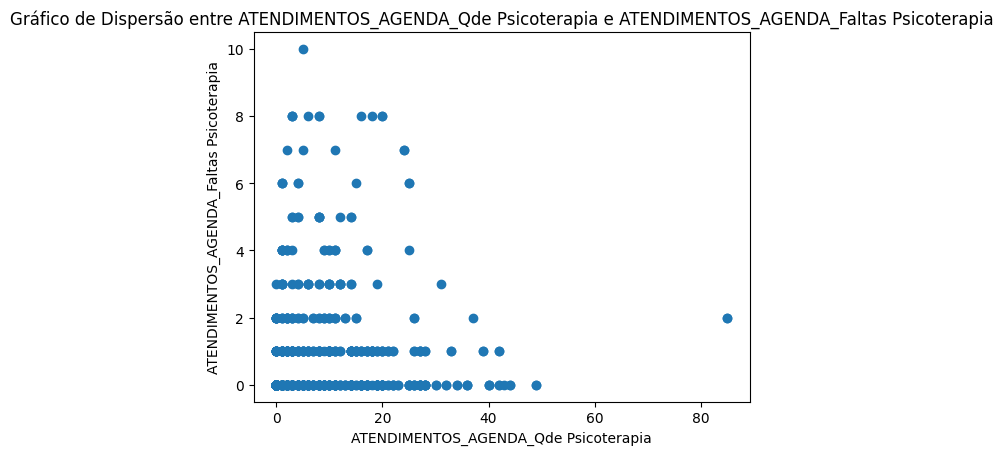

In [591]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(data['ATENDIMENTOS_AGENDA_Qde Psicoterapia'], data['ATENDIMENTOS_AGENDA_Faltas Psicoterapia'])
plt.xlabel('ATENDIMENTOS_AGENDA_Qde Psicoterapia')
plt.ylabel('ATENDIMENTOS_AGENDA_Faltas Psicoterapia')
plt.title('Gráfico de Dispersão entre ATENDIMENTOS_AGENDA_Qde Psicoterapia e ATENDIMENTOS_AGENDA_Faltas Psicoterapia')
plt.show()

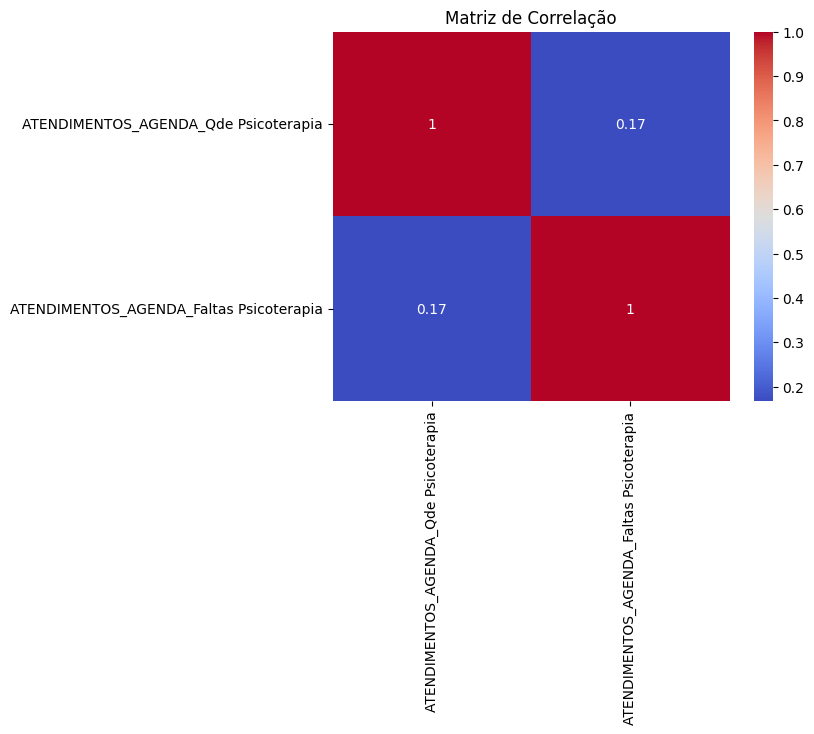

In [592]:
import seaborn as sns

# Calcule a matriz de correlação
correlation_matrix = data[["ATENDIMENTOS_AGENDA_Qde Psicoterapia","ATENDIMENTOS_AGENDA_Faltas Psicoterapia"]].corr()


# Plote um heatmap da matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [593]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum"] = data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"] == 0

In [594]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum"].fillna(0)
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum"].replace(True, 1, inplace=True)
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum"].replace(False, 0, inplace=True)

data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum"].value_counts()

ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum
0    617
1    469
Name: count, dtype: int64

In [595]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco"] = (data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"] > 0) & (data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"] <= data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"].mean() )

In [596]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco"].fillna(0)
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco"].replace(True, 1, inplace=True)
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco"].replace(False, 0, inplace=True)

data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco"].value_counts()

ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco
0    819
1    267
Name: count, dtype: int64

In [597]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito"] = data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"] > data["ATENDIMENTOS_AGENDA_Qde Psicoterapia"].mean() 

In [598]:
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito"].fillna(0)
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito"].replace(True, 1, inplace=True)
data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito"].replace(False, 0, inplace=True)

data["ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito"].value_counts()

ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito
0    736
1    350
Name: count, dtype: int64

In [599]:
data["ATENDIMENTOS_AGENDA_Datas Prescrição"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1081    NaN
1082    NaN
1083    NaN
1084    NaN
1085    NaN
Name: ATENDIMENTOS_AGENDA_Datas Prescrição, Length: 1086, dtype: object

In [600]:
data["ATENDIMENTOS_AGENDA_Qde Prescrições"]

0       0
1       0
2       0
3       0
4       0
       ..
1081    0
1082    0
1083    0
1084    0
1085    0
Name: ATENDIMENTOS_AGENDA_Qde Prescrições, Length: 1086, dtype: int64

## ATENDIMENTOS_AGENDA_Qde Prescrições e ATENDIMENTOS_AGENDA_Datas Prescrição

Descrição : Contagem de prescrições médicas
            e
            Datas dasprescrições médica


Observação : &&&

In [601]:
data["ATENDIMENTOS_AGENDA_Qde Prescrições"].fillna(0,inplace=True)

In [602]:
data = data.drop(["ATENDIMENTOS_AGENDA_Datas Prescrição"],axis=1)

## Feature Engineering 2

<Axes: >

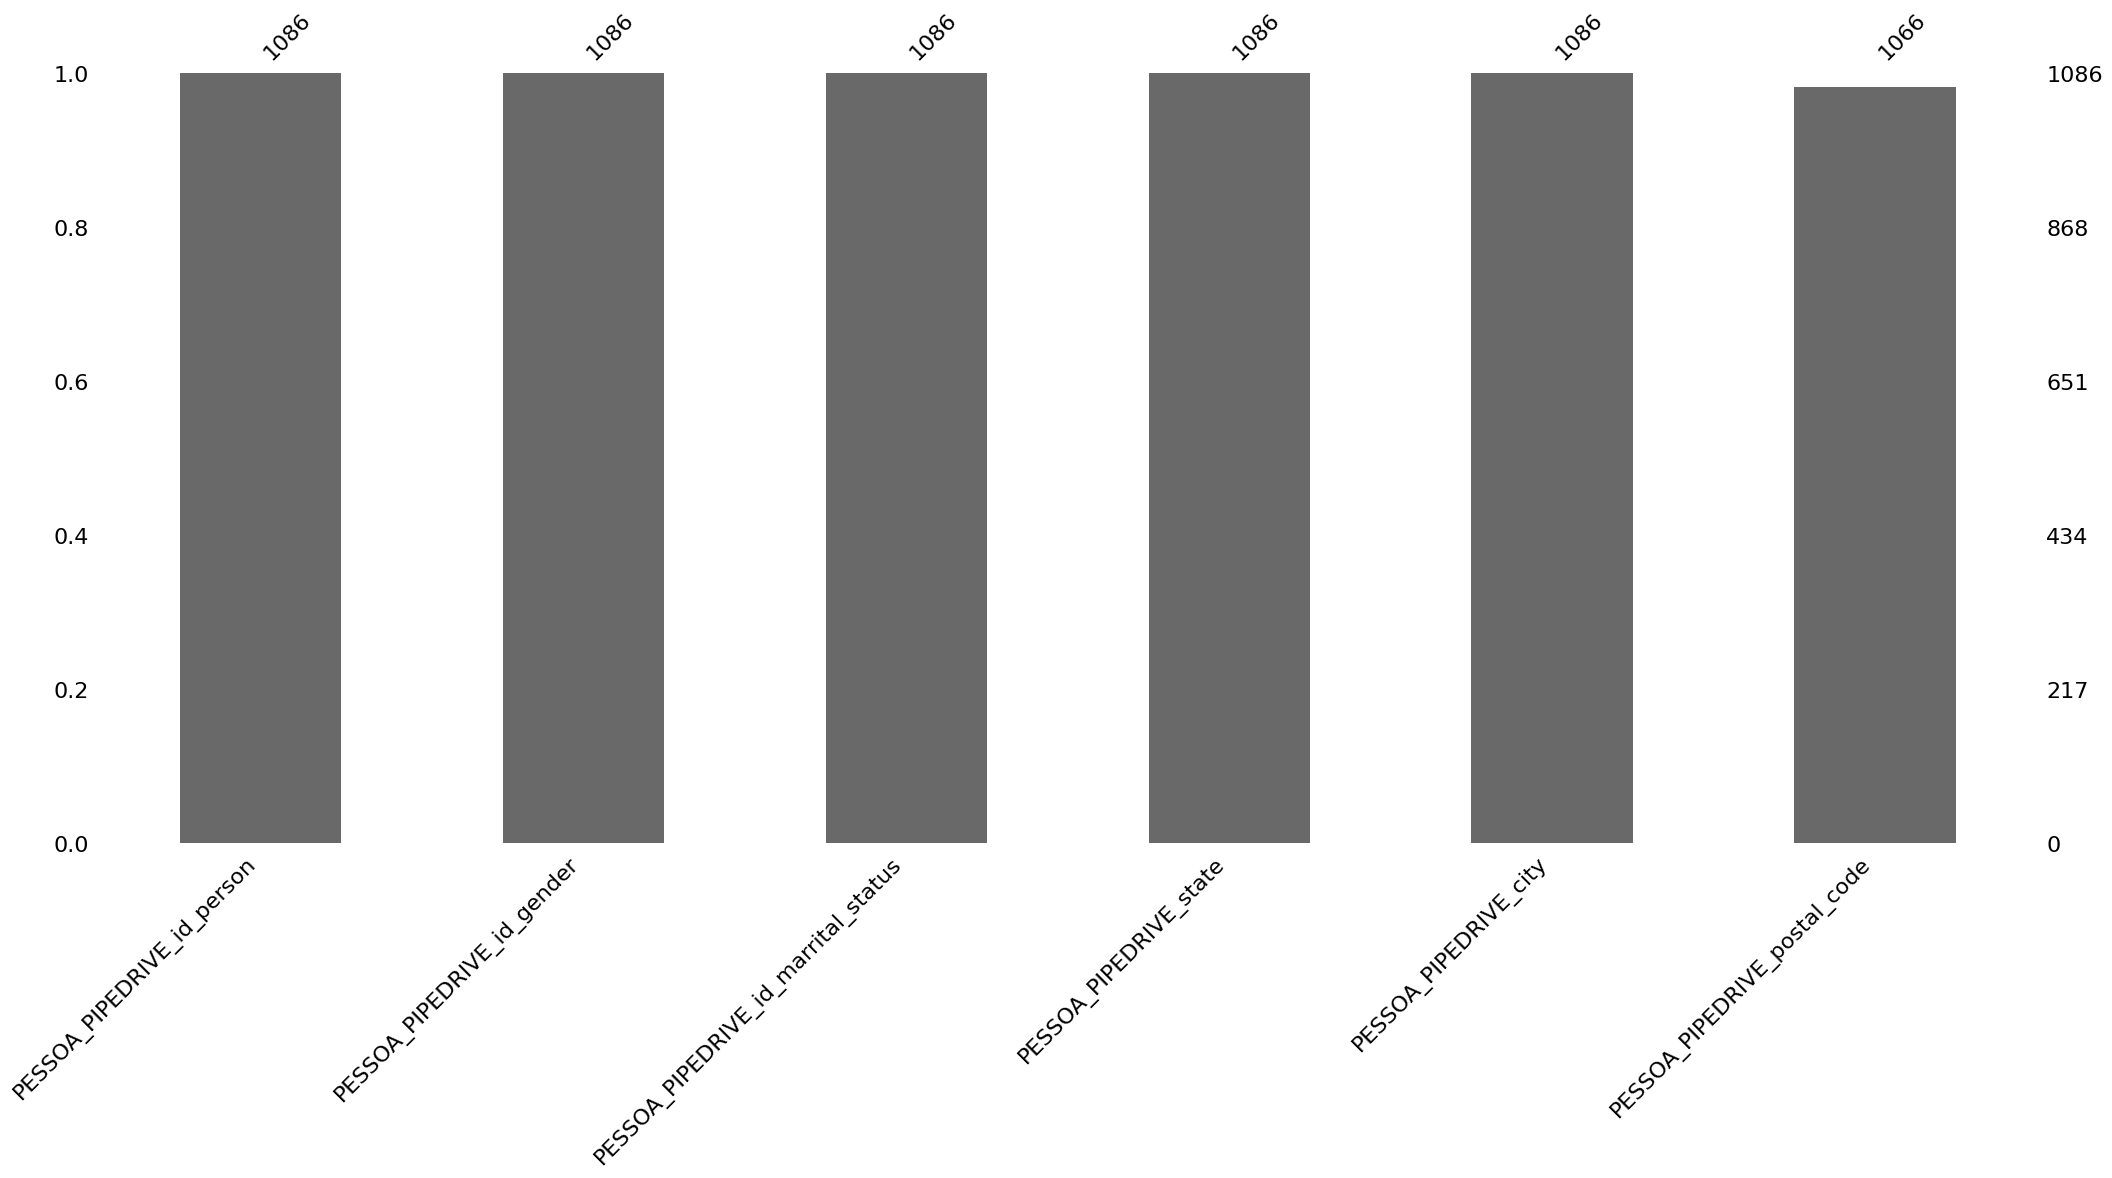

In [603]:
msno.bar(data.iloc[:,:6])

## PESSOA_PIPEDRIVE_id_person

Descrição : Identificador único da pessoa no Pipedrive. Campo obrigatório, preenchido automaticamente no momento do cadastro.



Observação : excluir posteriormente

In [604]:
data["PESSOA_PIPEDRIVE_id_person"]

0        250
1        343
2        453
3        483
4        483
        ... 
1081    5995
1082    5995
1083    5995
1084    6004
1085    6006
Name: PESSOA_PIPEDRIVE_id_person, Length: 1086, dtype: int64

## PESSOA_PIPEDRIVE_id_gender

Descrição : Identificador do gênero da pessoa. Campo obrigatório, preenchido automaticamente no momento do cadastro.

Observação : Selecionar somente os gêneros mais significativos (masculino e feminino), e depois criar uma nova coluna Binária representando o genero do cliente, onde 1 representa o gênero Masculino e 0 o feminino.

In [605]:
data["PESSOA_PIPEDRIVE_id_gender"].value_counts()

PESSOA_PIPEDRIVE_id_gender
64     618
63     458
110      7
117      3
Name: count, dtype: int64

In [606]:
data = data[data["PESSOA_PIPEDRIVE_id_gender"].isin([64,63])]   

In [607]:
data["PESSOA_PIPEDRIVE_id_gender"].value_counts()

PESSOA_PIPEDRIVE_id_gender
64    618
63    458
Name: count, dtype: int64

In [608]:
data

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_contract_start_date,PESSOA_PIPEDRIVE_contract_end_date,PESSOA_PIPEDRIVE_Canal de Preferência,PESSOA_PIPEDRIVE_notes_count,...,TWILIO_Mensagens Já Enviou,TWILIO_Mensagens Razão,PESSOA_PIPEDRIVE CRIANÇA,PESSOA_PIPEDRIVE JOVEM,PESSOA_PIPEDRIVE ADULTO,PESSOA_PIPEDRIVE IDOSO,TWILIO_Ligações Outbound Qtd Significativa,ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum,ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco,ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito
0,250,64,82,São Paulo,São Paulo,04534-020,2021-01-28,NaN,0,1,...,True,2.923077,0,0,1,0,1,1,0,0
1,343,64,80,Minas Gerais,Belo Horizonte,30421-318,2021-01-21,NaN,0,3,...,True,0.706107,0,0,1,0,0,1,0,0
2,453,63,80,Pará,Ananindeua,67110-280,2021-03-25,NaN,0,3,...,True,0.715909,0,0,1,0,0,1,0,0
3,483,64,80,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,...,True,2.125000,0,0,0,1,1,1,0,0
4,483,64,80,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,...,True,2.125000,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081,5995,64,82,São Paulo,Ribeirão Preto,14093-010,2023-11-23,NaN,239,1,...,False,0.000000,0,0,1,0,0,1,0,0
1082,5995,64,82,São Paulo,Ribeirão Preto,14093-010,2023-11-23,NaN,239,1,...,False,0.000000,0,0,1,0,0,1,0,0
1083,5995,64,82,São Paulo,Ribeirão Preto,14093-010,2023-11-23,NaN,239,1,...,False,0.000000,0,0,1,0,0,1,0,0
1084,6004,63,80,Bahia,Salvador,40296-200,2023-11-28,NaN,239,0,...,False,0.000000,0,1,0,0,0,1,0,0


In [609]:
data["PESSOA_PIPEDRIVE_id_gender Binário"] = data["PESSOA_PIPEDRIVE_id_gender"].map({64: 0, 63: 1})

In [610]:
data["PESSOA_PIPEDRIVE_id_gender Binário"]

0       0
1       0
2       1
3       0
4       0
       ..
1081    0
1082    0
1083    0
1084    1
1085    1
Name: PESSOA_PIPEDRIVE_id_gender Binário, Length: 1076, dtype: int64

## PESSOA_PIPEDRIVE_id_marrital_status

Descrição : Identificador do estado civil da pessoa. Campo obrigatório, preenchido automaticamente no momento do cadastro.


Observação : Realizamos one-hot encoding

In [611]:
data["PESSOA_PIPEDRIVE_id_marrital_status"]

0       82
1       80
2       80
3       80
4       80
        ..
1081    82
1082    82
1083    82
1084    80
1085    80
Name: PESSOA_PIPEDRIVE_id_marrital_status, Length: 1076, dtype: int64

In [612]:
data = pd.get_dummies(data, columns=['PESSOA_PIPEDRIVE_id_marrital_status'], prefix='Status')

In [613]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_contract_start_date,PESSOA_PIPEDRIVE_contract_end_date,PESSOA_PIPEDRIVE_Canal de Preferência,PESSOA_PIPEDRIVE_notes_count,PESSOA_PIPEDRIVE_done_activities_count,...,PESSOA_PIPEDRIVE IDOSO,TWILIO_Ligações Outbound Qtd Significativa,ATENDIMENTOS_AGENDA_Qde Psicoterapia Nenhum,ATENDIMENTOS_AGENDA_Qde Psicoterapia Pouco,ATENDIMENTOS_AGENDA_Qde Psicoterapia Muito,PESSOA_PIPEDRIVE_id_gender Binário,Status_80,Status_81,Status_82,Status_83
0,250,64,São Paulo,São Paulo,04534-020,2021-01-28,NaN,0,1,8,...,0,1,1,0,0,0,False,False,True,False
1,343,64,Minas Gerais,Belo Horizonte,30421-318,2021-01-21,NaN,0,3,21,...,0,0,1,0,0,0,True,False,False,False
2,453,63,Pará,Ananindeua,67110-280,2021-03-25,NaN,0,3,18,...,0,0,1,0,0,1,True,False,False,False
3,483,64,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,10,...,1,1,1,0,0,0,True,False,False,False
4,483,64,Minas Gerais,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,10,...,1,1,1,0,0,0,True,False,False,False


## PESSOA_PIPEDRIVE_state

Descrição : Estado onde a pessoa reside. Campo obrigatório, preenchido automaticamente no momento do cadastro.


Observação : Realizamos one-hot encoding

In [614]:
data["PESSOA_PIPEDRIVE_state"].value_counts()

PESSOA_PIPEDRIVE_state
São Paulo              452
Amazonas               191
Santa Catarina         120
Rio de Janeiro          61
Minas Gerais            58
Paraná                  49
Bahia                   47
Pernambuco              18
Ceará                   12
Rio Grande do Sul       12
State of Amazonas       12
Distrito Federal         8
Espírito Santo           6
Paraíba                  6
Pará                     5
Mato Grosso do Sul       5
Rio Grande do Norte      4
Alagoas                  4
Sergipe                  3
Piauí                    2
Maranhão                 1
Name: count, dtype: int64

In [615]:
data = pd.get_dummies(data, columns=['PESSOA_PIPEDRIVE_state'], prefix='Estado')

In [616]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_contract_start_date,PESSOA_PIPEDRIVE_contract_end_date,PESSOA_PIPEDRIVE_Canal de Preferência,PESSOA_PIPEDRIVE_notes_count,PESSOA_PIPEDRIVE_done_activities_count,FUNIL_ASSINATURA_PIPEDRIVE_id_stage,...,Estado_Pará,Estado_Pernambuco,Estado_Piauí,Estado_Rio Grande do Norte,Estado_Rio Grande do Sul,Estado_Rio de Janeiro,Estado_Santa Catarina,Estado_Sergipe,Estado_State of Amazonas,Estado_São Paulo
0,250,64,São Paulo,04534-020,2021-01-28,NaN,0,1,8,64,...,False,False,False,False,False,False,False,False,False,True
1,343,64,Belo Horizonte,30421-318,2021-01-21,NaN,0,3,21,65,...,False,False,False,False,False,False,False,False,False,False
2,453,63,Ananindeua,67110-280,2021-03-25,NaN,0,3,18,65,...,True,False,False,False,False,False,False,False,False,False
3,483,64,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,10,64,...,False,False,False,False,False,False,False,False,False,False
4,483,64,Juiz de Fora,36021-600,2021-01-27,2023-08-26,0,3,10,64,...,False,False,False,False,False,False,False,False,False,False


## PESSOA_PIPEDRIVE_city

Descrição : Cidade onde a pessoa reside. Campo obrigatório, preenchido automaticamente no momento do cadastro.

Observação : Realizamos uma codificação de frequência na coluna.

In [617]:
data["PESSOA_PIPEDRIVE_city"].value_counts()

PESSOA_PIPEDRIVE_city
São Paulo         185
Novo Airão        123
Manaus             80
São Carlos         55
Rio de Janeiro     51
                 ... 
Viamão              1
Ituverava           1
Petrópolis          1
Votorantim          1
Três Lagoas         1
Name: count, Length: 118, dtype: int64

In [618]:
from category_encoders import CountEncoder

# Suponha que você tenha um DataFrame chamado 'dados' com uma coluna 'Cidade'
ce = CountEncoder()
data['PESSOA_PIPEDRIVE_city Codificada'] = ce.fit_transform(data['PESSOA_PIPEDRIVE_city'])

In [619]:
data["PESSOA_PIPEDRIVE_city Codificada"].value_counts()

PESSOA_PIPEDRIVE_city Codificada
185    185
123    123
2       86
80      80
55      55
4       52
51      51
44      44
36      36
34      34
3       33
33      33
32      32
6       30
29      29
27      27
8       24
12      24
5       20
1       20
19      19
13      13
10      10
9        9
7        7
Name: count, dtype: int64

In [620]:
data = data.drop(columns=["PESSOA_PIPEDRIVE_city"])

In [621]:
data["PESSOA_PIPEDRIVE_postal_code"]

0       04534-020
1       30421-318
2       67110-280
3       36021-600
4       36021-600
          ...    
1081    14093-010
1082    14093-010
1083    14093-010
1084    40296-200
1085    79620-080
Name: PESSOA_PIPEDRIVE_postal_code, Length: 1076, dtype: object

In [622]:
data = data.drop(columns=["PESSOA_PIPEDRIVE_postal_code","PESSOA_PIPEDRIVE_id_person"])

In [623]:
data["PESSOA_PIPEDRIVE_contract_start_date"] = pd.to_datetime(data["PESSOA_PIPEDRIVE_contract_start_date"], format='%Y-%m-%d')

In [624]:
data["PESSOA_PIPEDRIVE_contract_end_date"] = pd.to_datetime(data["PESSOA_PIPEDRIVE_contract_end_date"], format='%Y-%m-%d')

In [625]:
data["PESSOA_PIPEDRIVE_contract_end_date"]

0             NaT
1             NaT
2             NaT
3      2023-08-26
4      2023-08-26
          ...    
1081          NaT
1082          NaT
1083          NaT
1084          NaT
1085          NaT
Name: PESSOA_PIPEDRIVE_contract_end_date, Length: 1076, dtype: datetime64[ns]

In [626]:
data = data[data["PESSOA_PIPEDRIVE_contract_end_date"].notna()]

In [627]:
data["PESSOA_PIPEDRIVE_contract_end_date"]

3     2023-08-26
4     2023-08-26
6     2023-08-18
10    2022-08-16
11    2022-09-11
         ...    
962   2023-10-25
963   2023-10-25
970   2023-09-22
986   2023-11-01
987   2023-11-01
Name: PESSOA_PIPEDRIVE_contract_end_date, Length: 422, dtype: datetime64[ns]

In [628]:
data["PESSOA_PIPEDRIVE_contract_start_date"] = data["PESSOA_PIPEDRIVE_contract_start_date"].dt.month

In [629]:
data["PESSOA_PIPEDRIVE_contract_end_date"] = data["PESSOA_PIPEDRIVE_contract_end_date"].dt.month

In [630]:
data["PESSOA_PIPEDRIVE_contract_end_date"]

3       8
4       8
6       8
10      8
11      9
       ..
962    10
963    10
970     9
986    11
987    11
Name: PESSOA_PIPEDRIVE_contract_end_date, Length: 422, dtype: int32

In [631]:
data["Saiu próximo mês"] = (data["PESSOA_PIPEDRIVE_contract_start_date"]) == (data["PESSOA_PIPEDRIVE_contract_end_date"] + 1)

In [632]:
data["Saiu próximo mês"].value_counts()

Saiu próximo mês
False    407
True      15
Name: count, dtype: int64

## Grafico de Correlação

In [633]:
correlacao = data.iloc[:,26:39].corr()

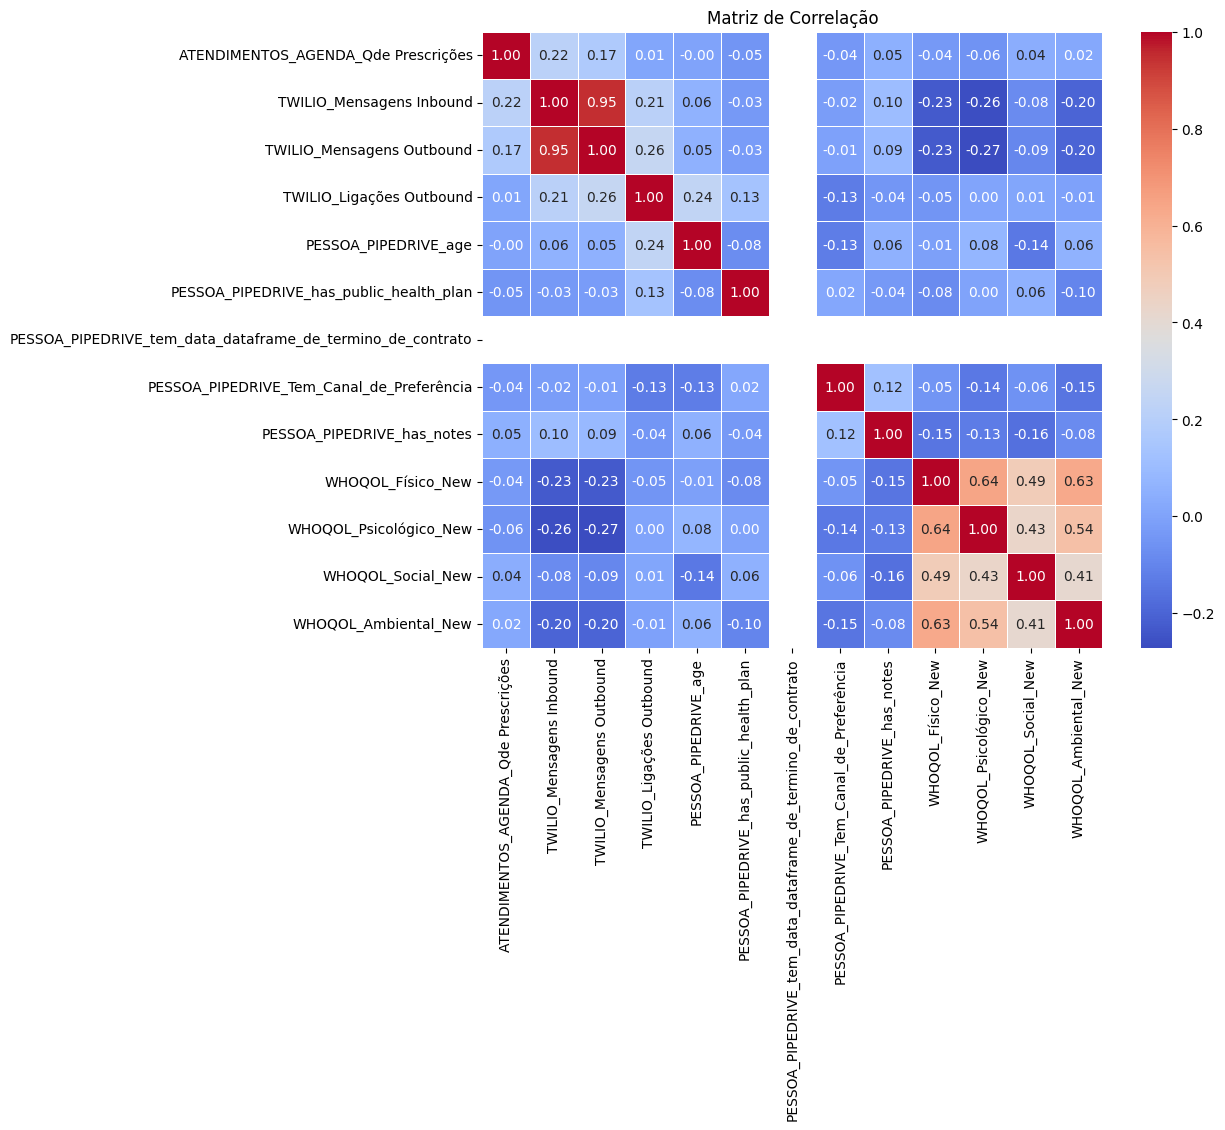

In [634]:

import seaborn as sns
import matplotlib.pyplot as plt

# 
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()